In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('F:\\machine learning\\urgent study\\iris.data.txt')
df = df.sample(frac = 1)
df.head()


,5.1,3.5,1.4,0.2,Iris-setosa
56,4.9,2.4,3.3,1.0,Iris-versicolor
11,4.8,3.0,1.4,0.1,Iris-setosa
142,6.8,3.2,5.9,2.3,Iris-virginica
5,4.6,3.4,1.4,0.3,Iris-setosa
33,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df.head().reset_index().drop('index', axis = 1, inplace = True)
df.columns = (['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class_type'])

In [4]:
def changer(cell):
    if cell.class_type == 'Iris-setosa':
        return 0
    elif cell.class_type == 'Iris-versicolor':
        return 1
    else :
        return 2
df['target'] = df.apply(changer, axis = 1 )


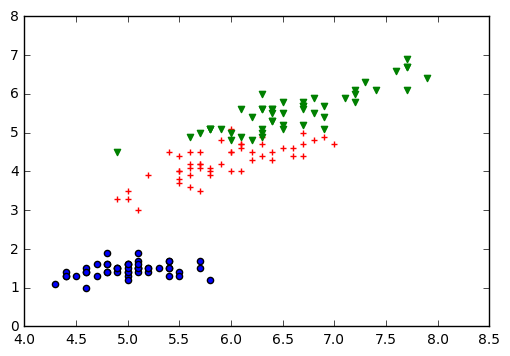

In [5]:
plt.figure()
plt.scatter(df[(df.class_type.isin(['Iris-setosa']))].sepal_length, df[(df.class_type.isin(['Iris-setosa']))].petal_length, )
plt.scatter(df[(df.class_type.isin(['Iris-versicolor']))].sepal_length, df[(df.class_type.isin(['Iris-versicolor']))].petal_length, color = 'r', marker = '+')
plt.scatter(df[(df.class_type.isin(['Iris-virginica']))].sepal_length, df[(df.class_type.isin(['Iris-virginica']))].petal_length, color = 'g', marker = 'v')


In [6]:
# the intention is to train a NN on iris dataset.
df_test = df.sample(20)
df_test.head()

,sepal_length,sepal_width,petal_length,petal_width,class_type,target
0,4.9,3.0,1.4,0.2,Iris-setosa,0
69,5.9,3.2,4.8,1.8,Iris-versicolor,1
133,6.1,2.6,5.6,1.4,Iris-virginica,2
103,6.5,3.0,5.8,2.2,Iris-virginica,2
136,6.4,3.1,5.5,1.8,Iris-virginica,2


In [7]:
df_train = df[(~df.isin(df_test))]
df_train.dropna(inplace = True)
df_train.head()
len(df_train)

129

In [8]:
# formation of Neural network with stochastic optimization
class Neural:
    #initialization
    def __init__(self, input_layer, hidden_layer,output_layer, learning_rate):
        self.i = input_layer
        self.h = hidden_layer
        self.o = output_layer
        self.lr = learning_rate
        self.activation = lambda x: 1/(1 + np.exp(-x))
        # random initialization of weights
        self.whi = np.random.normal(0.0, pow(self.h,-0.5), (self.h, self.i))
        self.who = np.random.normal(0.0, pow(self.o,-0.5), (self.o, self.h ))
#        print(self.whi.shape, self.who.shape)
        
        pass
    def train(self, input_data, target_data):
    # feed forward
        self.inp = np.array(input_data, ndmin = 2).T
        self.tar = np.array(target_data, ndmin = 2).T
        
        self.hidden_input = np.dot(self.whi, self.inp)
        self.hidden_output = self.activation(self.hidden_input)
#        print(self.hidden_input.shape)
#        self.bias =  np.zeros((self.h,1)) + 1
#        self.hidden_output_bias = np.append(self.hidden_output,self.bias, axis = 0)
        
        outer_input = np.dot(self.who, self.hidden_output)
        final_output = self.activation(outer_input)
        
    # error determination
        output_error = self.tar - final_output
#        print(output_error.shape)
        hidden_error = np.dot(self.who.T, output_error)
        
    # back propagation
        self.who = self.who + self.lr*np.dot((output_error*final_output*(1-final_output)), self.hidden_output.T)
        self.whi = self.whi + self.lr*np.dot((hidden_error*self.hidden_output*(1-self.hidden_output)), self.inp.T)
        
        pass
    def predict(self, input_data):
        self.inp = np.array(input_data, ndmin = 2).T
    
        
        self.hidden_input = np.dot(self.whi, self.inp)
        self.hidden_output = self.activation(self.hidden_input)
#        self.bias =  np.zeros((self.h,1)) + 1
#        self.hidden_output_bias = np.append(self.hidden_output,self.bias, axis = 0)
        
        
        outer_input = np.dot(self.who, self.hidden_output)
        final_output = self.activation(outer_input)
        
        return final_output
    pass

    
        

In [9]:
input_layer = 4
hidden_layer = 4
output_layer = 3
learning_rate = 0.3

NN  = Neural(input_layer, hidden_layer, output_layer, learning_rate)

In [10]:
# data processing part 1 
#df_train['bias'] = 1
target = df_train['target']
df_train.drop(['class_type', 'target'], axis = 1, inplace = True)
df_train.head()

# test_data preprocessing
# data processing part 1 
#df_test['bias'] = 1
target_test = df_test['target']
df_test.drop(['class_type', 'target'], axis = 1, inplace = True)
df_test.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
69,5.9,3.2,4.8,1.8
133,6.1,2.6,5.6,1.4
103,6.5,3.0,5.8,2.2
136,6.4,3.1,5.5,1.8


In [11]:
# data processing part 2
input_data = (df_train)
print(input_data.shape)


print(target.shape)

# test_data preprocessing
input_data_test = (df_test)
print(input_data.shape)
target_test = (target_test)
print(target_test.shape)
target.iloc[2]

(129, 4)
(129,)
(129, 4)
(20,)


0.0

In [12]:
epoch = 200
target_train = np.zeros((len(df_train), output_layer))
for j in np.arange(len(target_train)):
    target_train[j,int(target.iloc[j])] = 1


In [13]:
for i in np.arange(epoch):
    for j in np.arange(len(df_train)):
        NN.train(input_data.iloc[j], target_train[j])
pred =(NN.predict(input_data_test))
pred_final = np.argmax(pred, axis = 0)
pred_final

array([0, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1], dtype=int64)

In [14]:
acc = pred_final - target_test
print("the accuracy is  " ,acc.value_counts()[0]/acc.count())
print()
for i in np.arange(len(acc)):
    print(target_test.iloc[i], pred_final[i])

the accuracy is   0.85

0 0
1 2
2 2
2 2
2 2
1 2
0 0
0 0
1 1
1 1
2 2
1 1
1 1
0 0
2 2
0 0
1 1
0 0
1 2
1 1


In [15]:
np.ones(2)

array([ 1.,  1.])

In [16]:
help(np.array)

Help on built-in function array in module numpy.core.multiarray:

array(...)
    array(object, dtype=None, copy=True, order=None, subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an
        object whose __array__ method returns an array, or any
        (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then
        the type will be determined as the minimum type required
        to hold the objects in the sequence.  This argument can only
        be used to 'upcast' the array.  For downcasting, use the
        .astype(t) method.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy
        will only be made if __array__ returns a copy, if obj is a
        nested sequence, or if a copy is needed to satisfy any of the other
        requirements (`dtype`, `order`, etc.).